In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

[4.01427949 4.16691757 8.10838615 3.48191943 2.11454796 0.59383188
 8.76026848 9.18546451]


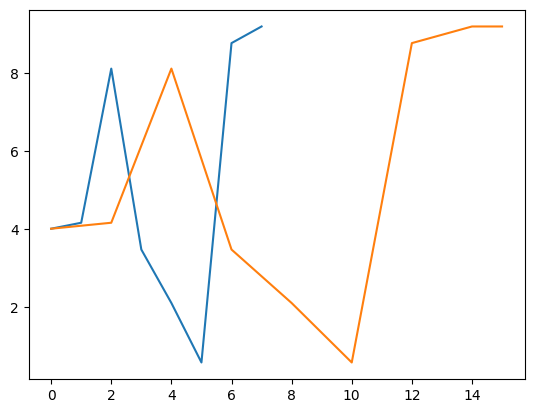

In [74]:
a = np.random.uniform(0,10,8)
print(a)
b = np.interp(np.arange(a.shape[0]*2)/2, np.arange(a.shape[0]), a)
plt.plot(a)
plt.plot(b)

[array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
       0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
       0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
       0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
       0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
       0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.7392

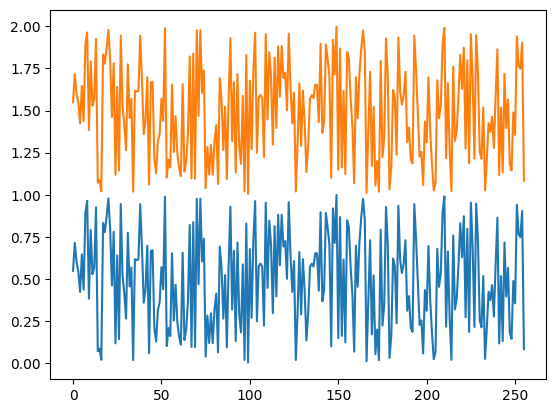

In [29]:
def noise_two(length, alpha, beta, seed):
    np.random.seed(seed)
    vals = []
    for i in range(0, alpha):
        noise = np.random.uniform(0, 1/(2**(alpha-i-1)), length//(2**i))
        vals.append(noise)
    return vals
vals = noise_two(2**8, 1, 0.1, 0)
print(vals)
# plot values
for val in vals:
    plt.plot(val)

noise = np.sum(vals, axis=0)
plt.plot(noise + 1)

In [88]:
torch.manual_seed(0)
torch.normal(0, 1, size=(6,))

tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845, -1.3986])

In [89]:
torch.manual_seed(0)
torch.normal(0, 1, size=(2,3))

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986]])

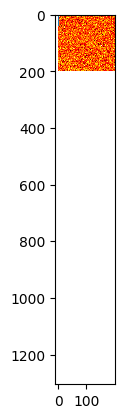

In [90]:
def deterministic_grid(width: int, height: int, x: int, y: int, alpha: float, seed: int):
    grid = torch.zeros(width, height)
    for i in range(width):
        for j in range(height):
            gen = torch.manual_seed(seed + (i + x) * 89 + (j + y) * 31)
            grid[i][j] = torch.normal(0, alpha, size=(1,), generator=gen)
    return grid

g = deterministic_grid(200, 200, 0, 0, 0.45, 0)
plt.imshow(g, cmap='hot', interpolation='nearest')
plt.hist(g.flatten(), bins=100)
plt.show()

In [79]:
def noise(width: int, height: int, alpha: float=0.45, beta: int=5, x: int=0, y: int=0, seed: int=0):
    # grid = torch.clip(torch.normal(0, alpha, (width+beta,height+beta)), -1, 1)
    grid = deterministic_grid(width+beta*2, height+beta*2, x-beta, y-beta, alpha, seed)
    smoother = torch.nn.AvgPool2d(3, stride=1, padding=0)
    for _ in range(beta):
        grid = smoother(grid[None,None,:,:]).squeeze()
    return grid

torch.Size([82, 82])
torch.Size([80, 80])
torch.Size([78, 78])
torch.Size([76, 76])
torch.Size([74, 74])
torch.Size([72, 72])
torch.Size([70, 70])
torch.Size([68, 68])
torch.Size([66, 66])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([72, 72])
torch.Size([70, 70])
torch.Size([68, 68])
torch.Size([66, 66])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([66, 66])
torch.Size([64, 64])


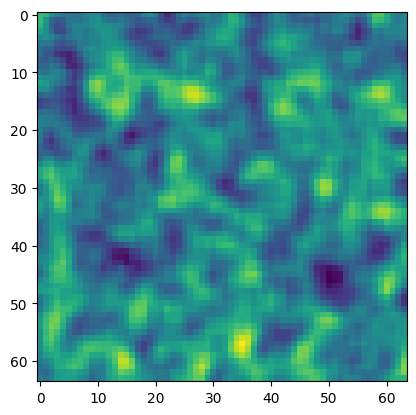

In [81]:
grid = noise(width=64, height=64, alpha=0.5, beta=10)
print(grid.shape)
grid2 = noise(width=64, height=64, alpha=0.5, beta=5, x=10, y=10, seed=1)
print(grid2.shape)
grid += grid2
grid += noise(width=64, height=64, alpha=0.5, beta=2, x=20, y=20, seed=2)
plt.imshow(grid)


In [2]:
grid = np.zeros((10, 10), dtype=int)
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
grid[4,1] = 1
grid[6,6] = 2
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [52]:
start = (2,2)
end = (6,7)

dir: (4, 5)
curr: [2, 2]
untill: (2.5, 2.5)
to_reach: (0.125, 0.1)
first_direction_to_reach 1
distance_in_direction: 0.1
new_pos: (2.4, 2.5)
[3, 3]
[2.4, 2.5]
---
dir: (4, 5)
curr: [2.4, 2.5]
untill: (2.5, 3.5)
to_reach: (0.025000000000000022, 0.2)
first_direction_to_reach 0
distance_in_direction: 0.025000000000000022
new_pos: (2.5, 2.625)
[4, 4]
[2.5, 2.625]
---
dir: (4, 5)
curr: [2.5, 2.625]
untill: (3.5, 3.5)
to_reach: (0.25, 0.175)
first_direction_to_reach 1
distance_in_direction: 0.175
new_pos: (3.2, 3.5)
[5, 5]
[3.2, 3.5]
---
dir: (4, 5)
curr: [3.2, 3.5]
untill: (3.5, 4.5)
to_reach: (0.07499999999999996, 0.2)
first_direction_to_reach 0
distance_in_direction: 0.07499999999999996
new_pos: (3.5, 3.875)
[6, 6]
[3.5, 3.875]
---


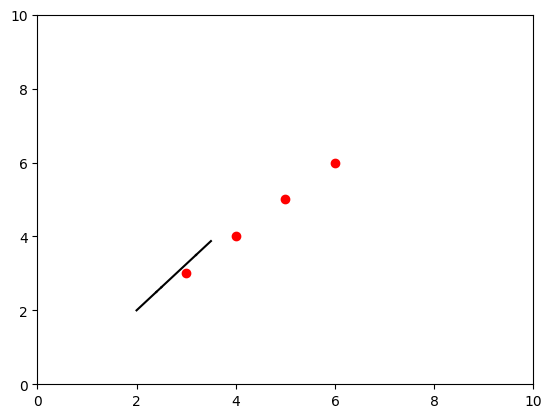

In [55]:
curr = list(start)
curr_block = list((round(start[0]), round(start[1])))
direction = (end[0] - start[0], end[1] - start[1])
done = end[0] == start[0] and end[1] == start[1]
step = 0
for i in range(4):
# while not done:
    print(f"dir: {direction}")
    print(f'curr: {curr}')
    if direction[0] > 0:
        untill_x = math.ceil(curr[0] - 0.49) + 0.5 * np.sign(direction[0])
    else:
        untill_x = math.floor(curr[0] + 0.49) + 0.5 * np.sign(direction[0])
    if direction[1] > 0:
        untill_y = math.ceil(curr[1] - 0.49) + 0.5 * np.sign(direction[1])
    else:
        untill_y = math.floor(curr[1] + 0.49) + 0.5 * np.sign(direction[1])
    print(f"untill: ({untill_x}, {untill_y})")
    to_reach_x = 0 if direction[0] == 0 else (untill_x - curr[0])/direction[0]
    to_reach_y = 0 if direction[1] == 0 else (untill_y - curr[1])/direction[1]
    to_reach = (to_reach_x, to_reach_y)
    print(f"to_reach: ({to_reach[0]}, {to_reach[1]})")
    first_direction_to_reach = np.argmin(to_reach)
    print(f"first_direction_to_reach {first_direction_to_reach}")
    if to_reach[first_direction_to_reach] == 0:
        first_direction_to_reach = 1 - first_direction_to_reach
    distance_in_direction = to_reach[first_direction_to_reach]
    print(f"distance_in_direction: {distance_in_direction}")
    new_pos = (curr[0] + direction[0]*distance_in_direction, curr[1] + direction[1]*distance_in_direction)
    print(f"new_pos: {new_pos}")
    # if reaching corner
    if all(to_reach):
        curr_block[0] += np.sign(direction[0])
        curr_block[1] += np.sign(direction[1])
    else:
        curr_block[first_direction_to_reach] += np.sign(direction[first_direction_to_reach])
    print(curr_block)
    # plot line from curr to new_pos
    plt.plot([curr[0], new_pos[0]], [curr[1], new_pos[1]], 'k-')
    curr = list(new_pos)
    print(curr)
    print("---")
    step += 1
    # plot block
    plt.plot(curr_block[0], curr_block[1], 'ro')
    if curr_block[0] == end[0] and curr_block[1] == end[1]:
        done = True

# plot grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [39]:
start = (4.1,4)
end = (2,2)

KeyboardInterrupt: 

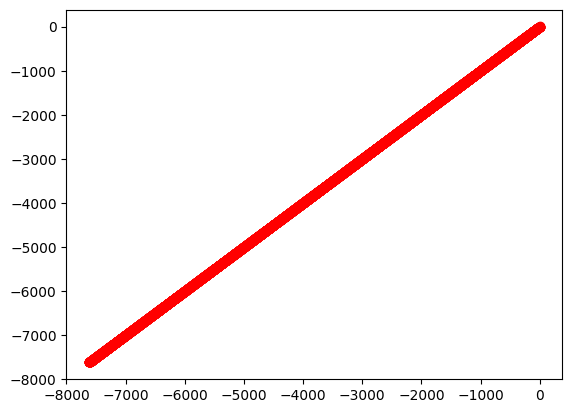

In [40]:
curr = list(start)
curr_block = list(start)
direction = (end[0] - start[0], end[1] - start[1])
done = end[0] == start[0] and end[1] == start[1]
while not done:
    if direction[0] > 0:
        untill_x = math.ceil(curr[0] - 0.49) + 0.5 * np.sign(direction[0])
    else:
        untill_x = math.floor(curr[0] + 0.49) + 0.5 * np.sign(direction[0])
    if direction[1] > 0:
        untill_y = math.ceil(curr[1] - 0.49) + 0.5 * np.sign(direction[1])
    else:
        untill_y = math.floor(curr[1] + 0.49) + 0.5 * np.sign(direction[1])
    to_reach_x = 0 if direction[0] == 0 else (untill_x - curr[0])/direction[0]
    to_reach_y = 0 if direction[1] == 0 else (untill_y - curr[1])/direction[1]
    to_reach = (to_reach_x, to_reach_y)
    first_direction_to_reach = np.argmin(to_reach)
    if to_reach[first_direction_to_reach] == 0:
        first_direction_to_reach = 1 - first_direction_to_reach
    distance_in_direction = to_reach[first_direction_to_reach]
    new_pos = (curr[0] + direction[0]*distance_in_direction, curr[1] + direction[1]*distance_in_direction)
    # if reaching corner
    if all(to_reach):
        curr_block[0] += np.sign(direction[0])
        curr_block[1] += np.sign(direction[1])
    else:
        curr_block[first_direction_to_reach] += np.sign(direction[first_direction_to_reach])
    curr = list(new_pos)
    
    if curr_block[0] == end[0] and curr_block[1] == end[1]:
        done = True
    # plot block
    plt.plot(curr_block[0], curr_block[1], 'ro')

# plot grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [6]:

# while curr != end: